# Crop Recommendation Dataset


This report presents an analysis on the Crop Recommendation Dataset. The goal is to make some classification models as well as one regression model and to extract as much information as possible from the results. The key points are to understand if my models are overfitting – underfitting, as well as to see how the change of the parameters are affecting the models.
The aim of this project is to take the inputs of the dataset, which are some agro-climatic parameters and make predict which is the most suitable crop to grow. This model could have a great impact in the agriculture industry.



The aim of this report is to predict the most suitable crop to grow based on several agro-climatic parameters.

**Features (Inputs):**

**N – Nitrogen** content in the soil (in mg/kg)

**P – Phosphorus** content in the soil (in mg/kg)

**K – Potassium** content in the soil (in mg/kg)

**temperature** – Average temperature in °C

**humidity** – Average relative humidity in %

**ph** – Soil pH value

**rainfall** – Rainfall in mm


The dataset was retrieved from Kaggle:
https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset


Advantages of Using Machine Learning Instead of Traditional Methods:


Ability to Detect Complex Patterns: ML algorithms are capable of uncovering intricate, non-linear relationships in the data that traditional rule-based or statistical techniques might miss.
High Scalability: After training, ML models can deliver instant predictions for a vast number of users across diverse geographic locations.
Continuous Improvement: These models can evolve and enhance their accuracy over time as more data is collected and fed into the system.

*   The ML models can provide tailored recommendations. Specifically  ,achine learning models can suggest crops that are best suited to the specific soil and climate conditions of a particular area, as opposed to generic advice used in conventional methods.
*  Ability to detect complex patterns. ML algorithms are capable of uncovering intricate, non-linear relationships in the data that traditional rule-based or statistical techniques might miss.
*   After training, ML models can deliver instant predictions for a vast number of users across diverse geographic locations.
*   Lastly it is quite important that ML models have continuous improvement.
These models can evolve and enhance their accuracy over time as more data is collected and fed into the system.


By applying techniques such as Decision Trees, Random Forests, or other models, this approach facilitates intelligent, data-driven decisions in agriculture, promoting better results and more sustainable farming practices.

In [16]:
#load dataset
from google.colab import files
uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')


#folder creation - downloading the kaggle set
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# downloading the kaggle set
!kaggle datasets download -d madhuraatmarambhagat/crop-recommendation-dataset
!unzip crop-recommendation-dataset.zip -d crop_dataset

Saving kaggle.json to kaggle (1).json
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset
License(s): apache-2.0
crop-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  crop-recommendation-dataset.zip
replace crop_dataset/Crop_recommendation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In the beginning i am going to check the data of the dataset.
I need tosee what kind of data i have, to check if there are empty values.
Furthermore i need to understand how many different seeds there are.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv('/content/crop-recommendation-dataset.zip')
#df[['temperature', 'humidity', 'ph', 'rainfall']].round()
#Inicialy i made the values round, but afterwards i noticed that this action is affecting the model's results. Therefore, i think its important to make a note here for that.

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Below we can cee all the different seeds

In [ ]:
df['label'].nunique()


22

Therefore we have 22 different seeds.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [19]:
df.isnull().sum()
#as we can see there are not empty values, so there is not need for data cleaning

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [20]:
df.drop('label',axis=1).corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Now i am proceeding with thetraining of the models!
I havecreated a variaety of models.
In the beginning i chose to check which criterion is providing the best results in the trees and ofcourse to interprent the results i got.

In [21]:
X= df.drop('label', axis=1)
y= df['label']

In [22]:
X.shape

(2200, 7)

In [23]:
y.shape

(2200,)

I am puting a for loop so i can have all 3 criterions together. The model will give me as output all the results but it will also inform me which criterion worked better



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score , log_loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20)

print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)

criteria = ['gini', 'log_loss', 'entropy']

best_score = 0
best_criterion = []
best_model = []

for criterion in criteria:
    print(f"\nTraining Decision Tree with criterion = '{criterion}'")
    dtree = tree.DecisionTreeClassifier(criterion=criterion)
    dtree.fit(X_train, y_train)

    X_pred= dtree.predict(X_train)
    y_pred = dtree.predict(X_test)
    y_pred_proba = dtree.predict_proba(X_test)

    train_accuracy = accuracy_score(y_train, X_pred)
    score = accuracy_score(y_test, y_pred)
    print("\nTraining Accuracy:", train_accuracy)
    print(f"Accuracy Score: {score:}")

    if score > best_score:
        best_score = score
        best_criterion = criterion
        best_model = dtree

print(f"\nBest criterion: '\033[1m{best_criterion}\033[0m' with accuracy: \033[1m{best_score:.4f}\033[0m")

X_train size: (1540, 7)
y_train size: (1540,)
X_test size: (660, 7)
y_test size: (660,)

Training Decision Tree with criterion = 'gini'

Training Accuracy: 1.0
Accuracy Score: 0.9803030303030303

Training Decision Tree with criterion = 'log_loss'

Training Accuracy: 1.0
Accuracy Score: 0.9772727272727273

Training Decision Tree with criterion = 'entropy'

Training Accuracy: 1.0
Accuracy Score: 0.9772727272727273

Best criterion: 'gini' with accuracy: 0.9803


In the training accuracy im getting 1 as result, which is a strong indication of overfitting! But the accuraccy score is very close.
 I need to investigate further.

In [ ]:
# next, i'm calculating log loss / cross-entropy loss

print("Test Log Loss:", log_loss(y_test, y_pred_proba))

cv_scores = cross_val_score(dtree, X, y, cv=5, scoring='accuracy')
print("\nCross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

cv_log_loss = cross_val_score(dtree, X, y, cv=5, scoring='neg_log_loss')
print("\nCross-validation Log Loss Scores:", -cv_log_loss)
print("Mean CV Log Loss:", -cv_log_loss.mean())

Test Log Loss: 0.600727556485286

Cross-validation Accuracy Scores: [0.99090909 0.97045455 0.99545455 0.98409091 0.97727273]
Mean CV Accuracy: 0.9836363636363638

Cross-validation Log Loss Scores: [0.40958697 0.81917394 0.24575218 0.65533915 0.81917394]
Mean CV Log Loss: 0.5898052372764626


**Test log loss** : It is not that bad, but it shows that the model might have issues in the level of how the probabilities are connected with the classes of my model. It show that there is room for improvement.


**Cross validation score**: it model gives very good results, which is good sign that the model is not underfitting


**Cross validation logg loss score**: it shows that the model has made some wrong predictions. Meaning that the model is not stable in all predictions and it might overftis in some folds.

Now i am testing now the model using my own input

In [ ]:
newSample = np.array([[90,40,40,21,78, 6,250]])
prediction = dtree.predict(newSample)
print("Based on the soil, the best seed is:", prediction)

Based on the soil, the best seed is: ['rice']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Next i have prepared a couple of visualizations, using the values i got from the model
The first one is the accuracy of the train / test in relation to the depth of the tree. We can see the expecting results based on the previous results.

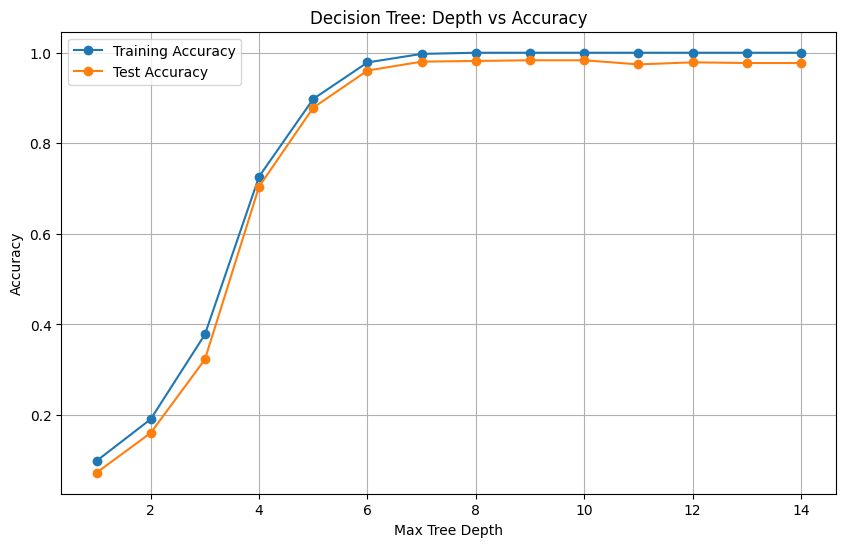

In [ ]:
from sklearn.tree import DecisionTreeClassifier

train_accuracies = []
test_accuracies = []
depths = range(1, 15)

for depth in depths:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The model is underfitting in the beggining, for depth 1-4

Adterwards it shows great results and then it shows indication of overfitting.

Ideal depth 6-8

Aftrwards, i created a visualization regarding the learning rate of the model.

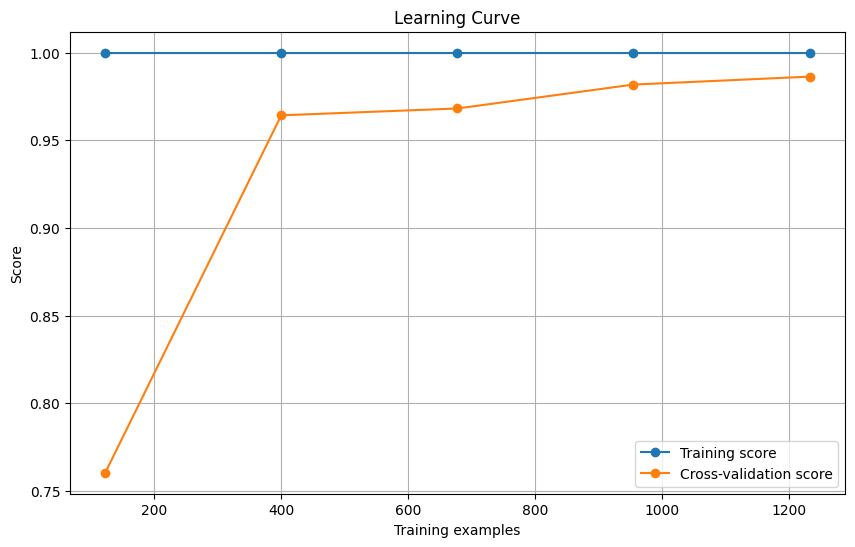

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, cv=5)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

I also wanted to get the visualization of the tree itself, using the graphviz library. unfortunately the result is not what i expected, us the graph is too big.

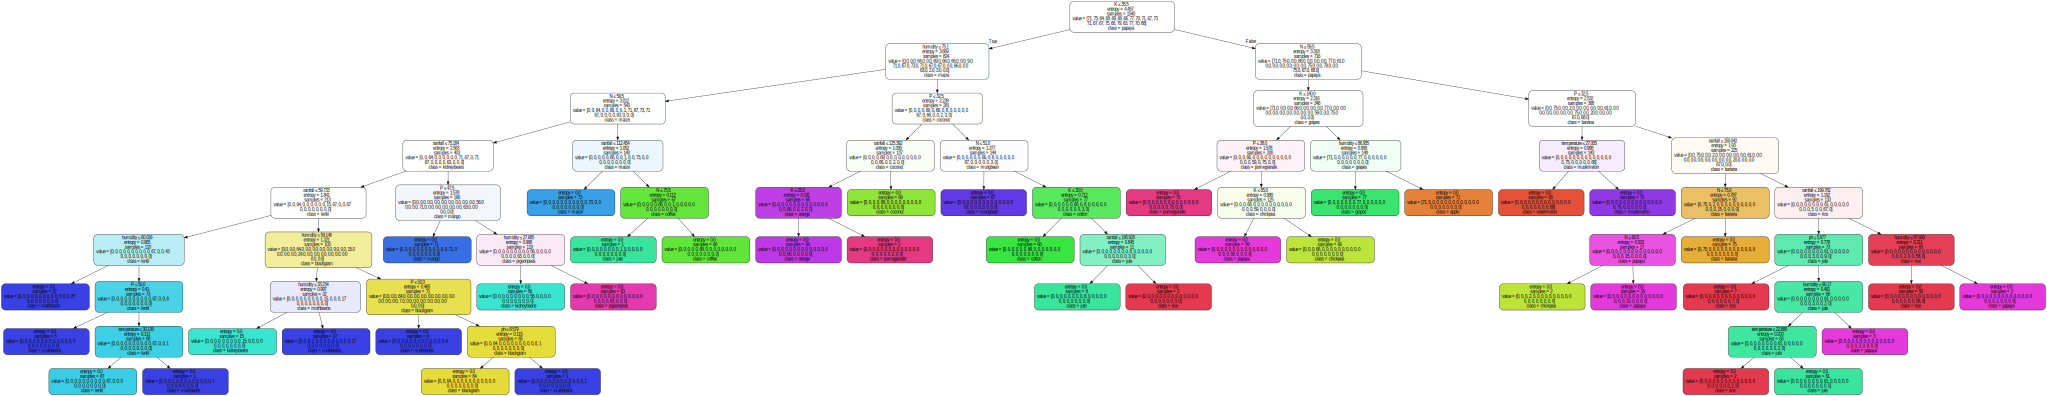

In [ ]:
import graphviz
graph_data = tree.export_graphviz(dtree, out_file=None,
                     feature_names=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
                     class_names=['apple','banana','blackgram','chickpea','coconut','coffee','cotton','grapes','jute','kidneybeans','lentil', 'maize','mango','mothbeans', 'mungbean','muskmelon','orange','papaya','pigeonpeas','pomegranate','rice','watermelon'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(graph_data)
graph.render("iris",format="png")
graph

#apparently the graph is too huge, so it can help me.



Now lets also check how some hyperparameters, like the tree depth and splits (but also the leaves) affect the accuracy of the model.
Here we will be able to understand better when the model overfits / underfits


In [ ]:
splits = [2, 5, 10, 20, 50, 100]

print("\033[1mExploring min_samples_split:\n\033[0m")
for min_split in splits:
    dtree = tree.DecisionTreeClassifier(criterion='log_loss', min_samples_split=min_split, random_state=7)
    dtree.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, dtree.predict(X_train))
    test_acc = accuracy_score(y_test, dtree.predict(X_test))

    print(f"min_samples_split = {min_split}")
    print(f"Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f}")
    print(f"Tree Depth: {dtree.get_depth()} | Leaves: {dtree.get_n_leaves()}")
    print("-" * 40)

Exploring min_samples_split:

min_samples_split = 2
Train Accuracy: 1.000 | Test Accuracy: 0.976
Tree Depth: 8 | Leaves: 38
----------------------------------------
min_samples_split = 5
Train Accuracy: 1.000 | Test Accuracy: 0.976
Tree Depth: 8 | Leaves: 38
----------------------------------------
min_samples_split = 10
Train Accuracy: 1.000 | Test Accuracy: 0.976
Tree Depth: 8 | Leaves: 38
----------------------------------------
min_samples_split = 20
Train Accuracy: 0.997 | Test Accuracy: 0.974
Tree Depth: 8 | Leaves: 36
----------------------------------------
min_samples_split = 50
Train Accuracy: 0.987 | Test Accuracy: 0.977
Tree Depth: 8 | Leaves: 35
----------------------------------------
min_samples_split = 100
Train Accuracy: 0.953 | Test Accuracy: 0.944
Tree Depth: 6 | Leaves: 23
----------------------------------------


We can see that the tree goes from overfitting to underfitting, from min_samples= 2 split til min_samples =100 split.
As i can see the model begins to work better after the min_samples= 20 and we have great results when the min_samples_split is 50. Then the model has train acc= 0.98 and test acc = 0.97. The result here is very satisfying.


Below we can visualize the above results.
In generall i beleive that 'playing' with these hyperparameters of my model (depth and leaves) helped me understand better where the model overfitts/overfitts, us i found out in the beginning,  but i can also understand where my model gets the best result.


Therefore i belive that i should also get a visualization regarding the min_samples_split.

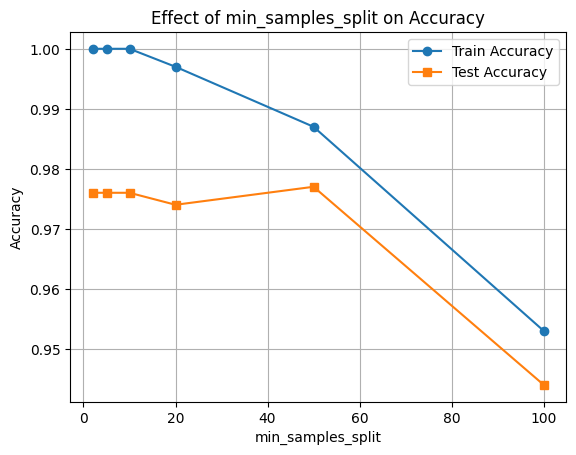

In [ ]:
splits = [2, 5, 10, 20, 50, 100]
train_accuracies = [1.000, 1.000, 1.000, 0.997, 0.987, 0.953]
test_accuracies =  [0.976, 0.976, 0.976, 0.974, 0.977, 0.944]

plt.plot(splits, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(splits, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_split on Accuracy')
plt.legend()
plt.grid(True)
plt.show()

As this is my first report, I decided that i wanna continue a little bit  and use a couple more methods and experiment a bit more.
Therefore lets also check how the model works using the **Random Forest** algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9878787878787879


As the random forest gives a result of 98% we can tell that we have great results with this model too, without showing us overfitting signs

Furthermore i wanted to take one more step and perform also a **GridSearchCV**

For this one i used chatgtp for debugging, i was not familiar with this method.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2,5,10,20,50,100],
    'max_depth':[None,5,10,15]

}
dtree = DecisionTreeClassifier(random_state=7)
grid_search = GridSearchCV(estimator=dtree , param_grid = param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X,y)
print('\nBest parameters:' , grid_search.best_params_)
print('\nBest accuracy score:', grid_search.best_score_)


from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("\nCross-validation accuracy scores:", scores)
print("\nMean accuracy:", scores.mean())

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 50}

Best accuracy score: 0.9886363636363636

Cross-validation accuracy scores: [0.99772727 0.99318182 0.99772727 0.99545455 0.98863636]

Mean accuracy: 0.9945454545454545


This model also validates that the min_samples_split=50 is avoiding the overfitting.
This model gives criterion 'gini' as the best, but this is not something worring in regards with the previous results. All three criterion gave similar results.
With cv accuracy score - mean accuracy we can tell again that the results are excellent, as we have no fear of overfitting now.

**KNN neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9727272727272728


Even the Knn neighbors gives great results, but the Decision Tree and the Random Forest worked a bit better.
This type of model does not work that good in structured data, as the other models.


# **Metrics for model performance**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        25
   blackgram       1.00      0.97      0.99        36
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        34
      cotton       1.00      1.00      1.00        34
      grapes       1.00      1.00      1.00        23
        jute       0.81      1.00      0.90        30
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        33
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        34
      papaya       1.00    

The accuracy of the model is 99%
Macro avg - weighted avg are also good showing consistent and balanced performance across the classes.

Regarding the other metrics there were a few cases were the result were not 1, implying that the model made some wrong predictions, but this is accepted, so i will not continue explaining.


# **Regression**

As target value i am going to set the 'K' which is the Potassium content int he soil.

I am beginning with a simple Linear Regression, to see what result i will get.
I will also remove the labels as they are characters.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y= df['K']
X = df.drop(['label', 'K'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 913.40
R² Score: 0.62


To begin with, the MSE is relatively high.
But the R² is good for a simple linear regression, but there is room for improvement.
Lets check how can we improve them.
I will use the **Random Forest Regressor**

In [ ]:
y = df['K']
X = df.drop(['label', 'K'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:}')
print(f'R² Score: {r2}')

MSE: 16.65059613636364
R² Score: 0.9930339811834848


Now the MSE is quite low, indicating high accuracy, which shows that the Randofom Forest worked well.
The R² score is 99% showing excellent predictive performance and strong model fit.

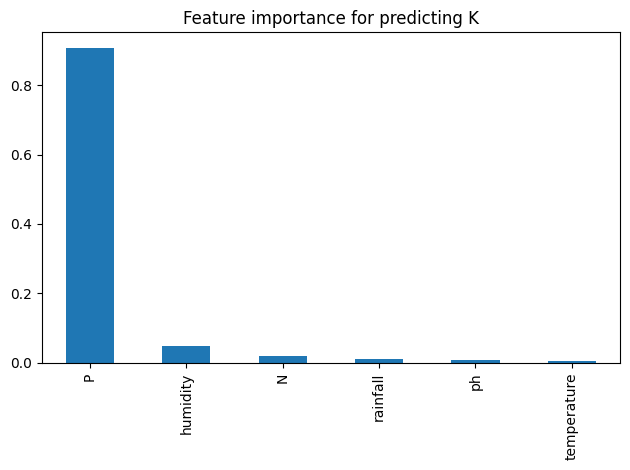

In [ ]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar', title='Feature importance for predicting K')
plt.tight_layout()
plt.show()

The visualization reveals that the Phosphorus is the most ifluential predictor for Potassium (K). That suggests strong relationship between those two nutrients in the dataset.

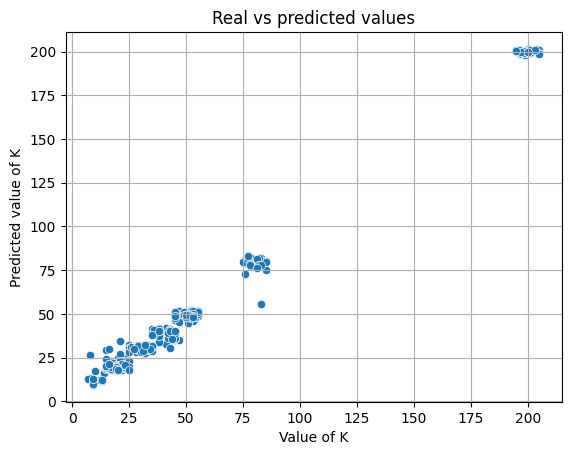

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Value of K")
plt.ylabel("Predicted value of K")
plt.title("Real vs predicted values")
plt.grid(True)
plt.show()


In the scatterplot we can see that the predicted values follows closely the real values in the diagonal. The plot indicates strong predictive accuracy of the model.

Following we can verify it putting new data and confirm that we will get the expected results.

In [ ]:
new_data = pd.DataFrame([{
    'N':90,
    'P': 40,
    'temperature': 28.5,
    'humidity': 82.0,
    'ph':7.3,
    'rainfall': 200

}])

new_data_scaled = scaler.transform(new_data)
K_prediction = model.predict(new_data_scaled)
print("Predict value of K using the new data:", K_prediction[0])

Predict value of K using the new data: 39.98


I also want to check the XGboost model.

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X = df.drop(['label', 'K'], axis=1)
y = df['K']

pipeline = make_pipeline(StandardScaler(), xgb.XGBRegressor(random_state=42, verbosity=0))

r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print("R² scores για 5-fold CV:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

neg_mse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores
print("MSE scores για 5-fold CV:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))


R² scores για 5-fold CV: [ -0.40342319 -25.77935219   0.91009045   0.95887411  -0.92845511]
Mean R²: -5.0484531879425045
MSE scores για 5-fold CV: [823.60388184 252.62760925 414.96374512 199.67210388 177.22009277]
Mean MSE: 373.61748657226565


The results show that XGBoost fits the data well at some folds (R²: 0.91 and 0.95), but fails at others (the negative ones). This suggests possible imbalance in the data.

Probably further data preprocessing or hyperparameter tuning is needed, but i will not continue as i not confident with thsi model. I just wanted to see the XGBoost.



**AI Assistance Disclosure**

Portions of the code were developed with the assistance of ChatGPT. As a mathematics graduate with no formal programming background, I utilized this AI tool exclusively for debugging purposes and to clarify technical concepts related to code implementation. All final implementations and solutions represent my own work, with ChatGPT serving solely as a debugging aid to help identify and resolve errors in my original code.
As chatgpt was used in specific parts of the code, I have made a note in those parts to make it clear.
